In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [6]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print((itos))

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [98]:
# build the dataset
block_size = 3 # context lenght of amount of characters we take to predict the next one
X, Y = [], []

for w in words:
    # print (w)
    context = [0] * block_size

    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)

        # print(''.join(itos[i] for i in context), '--->', itos[ix])

        context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

In [10]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [11]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [12]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [30]:
embedding_dims = 2

In [13]:
# building lookup table C where we embed all the characters into a single, n-dimensional space (2 for now)
C = torch.rand((27, embedding_dims))

In [14]:
C

tensor([[0.0342, 0.9174],
        [0.1129, 0.3116],
        [0.5556, 0.4420],
        [0.8283, 0.4598],
        [0.0473, 0.6570],
        [0.7228, 0.5167],
        [0.4602, 0.3494],
        [0.1249, 0.5981],
        [0.2153, 0.9131],
        [0.1536, 0.5227],
        [0.0069, 0.5527],
        [0.5587, 0.6532],
        [0.1912, 0.4277],
        [0.9300, 0.4367],
        [0.6636, 0.5632],
        [0.5701, 0.0861],
        [0.9829, 0.8550],
        [0.6205, 0.7713],
        [0.5863, 0.6950],
        [0.2462, 0.2801],
        [0.5020, 0.0544],
        [0.5123, 0.0736],
        [0.2828, 0.1293],
        [0.8620, 0.9721],
        [0.5809, 0.9005],
        [0.9445, 0.5888],
        [0.8483, 0.2071]])

In [15]:
C[5]

tensor([0.7228, 0.5167])

In [20]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([0.7228, 0.5167])

In [21]:
C[torch.tensor([5, 4, 5, 5, 7])]

tensor([[0.7228, 0.5167],
        [0.0473, 0.6570],
        [0.7228, 0.5167],
        [0.7228, 0.5167],
        [0.1249, 0.5981]])

In [22]:
C[X].shape

torch.Size([32, 3, 2])

In [24]:
X[13, 2]

tensor(1)

In [26]:
C[X][13, 2]

tensor([0.1129, 0.3116])

In [27]:
C[1]

tensor([0.1129, 0.3116])

In [55]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [56]:
hidden_layer_neurons = 100
W1 = torch.randn((block_size * embedding_dims, hidden_layer_neurons))
b1 = torch.randn((hidden_layer_neurons))

In [57]:
h = torch.tanh(emb.view((-1, block_size * embedding_dims)) @ W1 + b1)

In [62]:
h.shape

torch.Size([32, 100])

In [63]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [64]:
logits = h @ W2 + b2

In [65]:
logits.shape

torch.Size([32, 27])

In [66]:
counts = logits.exp()

In [72]:
prob = counts / counts.sum(1, keepdim=True)

In [75]:
prob.shape

torch.Size([32, 27])

In [79]:
loss = -prob[torch.arange(32), Y].log().mean()

In [80]:
loss

tensor(18.0202)

In [81]:
# bringing it all together 


In [99]:
X.shape, Y.shape # dataset

(torch.Size([228146, 3]), torch.Size([228146]))

In [214]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn((100), generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn((27), generator=g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

In [101]:
sum(p.nelement() for p in parameters) # number of total params

3481

In [200]:
lre = torch.linspace(-0.75, -2, 20_000)
lrs = 10**lre
lrs.shape

torch.Size([20000])

In [185]:
lrs

tensor([0.1778, 0.1778, 0.1778,  ..., 0.0100, 0.0100, 0.0100])

In [215]:
lri = []
lossi = []

for i in range(20_000):
    # minibatch construct
    ix = torch.randint(0, X.shape[0], (32,))

    # forward
    emb = C[X[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view((-1, 6)) @ W1 + b1)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y[ix])

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    lr = lrs[i]
    # lr = 0.01
    for p in parameters:
        p.data += -lr * p.grad

    # track stats
    lri.append(i)
    lossi.append(loss.item())

print(loss.item())

2.4656646251678467


In [209]:
lri

[tensor(0.1778),
 tensor(0.1778),
 tensor(0.1778),
 tensor(0.1778),
 tensor(0.1777),
 tensor(0.1777),
 tensor(0.1777),
 tensor(0.1776),
 tensor(0.1776),
 tensor(0.1776),
 tensor(0.1776),
 tensor(0.1775),
 tensor(0.1775),
 tensor(0.1775),
 tensor(0.1775),
 tensor(0.1774),
 tensor(0.1774),
 tensor(0.1774),
 tensor(0.1774),
 tensor(0.1773),
 tensor(0.1773),
 tensor(0.1773),
 tensor(0.1773),
 tensor(0.1772),
 tensor(0.1772),
 tensor(0.1772),
 tensor(0.1772),
 tensor(0.1771),
 tensor(0.1771),
 tensor(0.1771),
 tensor(0.1771),
 tensor(0.1770),
 tensor(0.1770),
 tensor(0.1770),
 tensor(0.1770),
 tensor(0.1769),
 tensor(0.1769),
 tensor(0.1769),
 tensor(0.1769),
 tensor(0.1768),
 tensor(0.1768),
 tensor(0.1768),
 tensor(0.1768),
 tensor(0.1767),
 tensor(0.1767),
 tensor(0.1767),
 tensor(0.1767),
 tensor(0.1766),
 tensor(0.1766),
 tensor(0.1766),
 tensor(0.1766),
 tensor(0.1765),
 tensor(0.1765),
 tensor(0.1765),
 tensor(0.1765),
 tensor(0.1764),
 tensor(0.1764),
 tensor(0.1764),
 tensor(0.1763

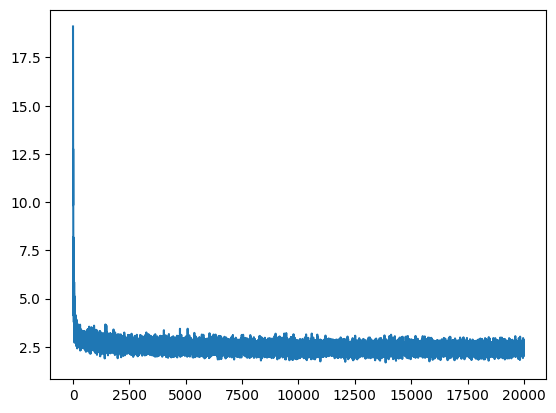

In [216]:
plt.plot(lri, lossi)

In [197]:
emb = C[X]
h = torch.tanh(emb.view((-1, 6)) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)
loss

tensor(2.3349, grad_fn=<NllLossBackward0>)

In [178]:
10**-0.75

0.1778279410038923

In [218]:
def build_dataset(words):
    block_size = 3
    X, Y = [], []

    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            
            X.append(context)
            Y.append(ix)

            context = context[1:] + [ix] # crop and append 
    
    X = torch.tensor(X)
    Y = torch.tensor(Y)

    print(X.shape, Y.shape)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182580, 3]) torch.Size([182580])
torch.Size([22767, 3]) torch.Size([22767])
torch.Size([22799, 3]) torch.Size([22799])


In [249]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn((200), generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn((27), generator=g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

sum(p.nelement() for p in parameters) # number of total params

11897

In [250]:
lri = []
lossi = []
stepi = []

In [259]:
for i in range(200_000):
    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (48,))

    # forward
    emb = C[Xtr[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view((-1, 30)) @ W1 + b1)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Ytr[ix])

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    # lrs[i]
    lr = 0.1 if i < 100_000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad

    # # track stats
    # lri.append(i)
    stepi.append(i)
    lossi.append(loss.log10().item())

print(loss.item())

2.3297479152679443


In [260]:
# loss on training 
emb = C[Xtr]
h = torch.tanh(emb.view((-1, 30)) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1541, grad_fn=<NllLossBackward0>)

In [261]:
# loss on dev
emb = C[Xdev]
h = torch.tanh(emb.view((-1, 30)) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1851, grad_fn=<NllLossBackward0>)

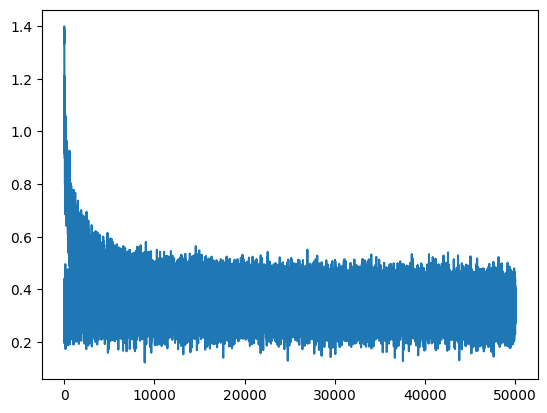

In [262]:
plt.plot(stepi, lossi)

In [238]:
# because loss on training and dev set is roughly equal we're underfitting, which might mean the network is too small

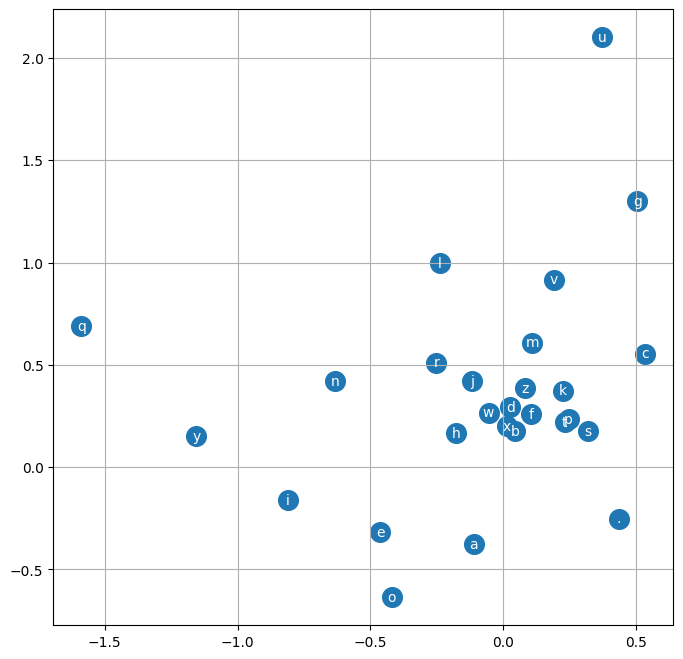

In [240]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i, 1].item(), itos[i], ha="center", va="center", color="white")
plt.grid("minor")

In [267]:
for _ in range(200):
    out = []
    context = [0] * block_size
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break

    print(''.join(itos[i] for i in out))

gylen.
nycer.
kaliiah.
arrelynn.
raance.
brahziendrejinven.
muridishel.
aava.
temaleigelyn.
camdy.
hamarik.
tel.
vuch.
liviani.
fabiianna.
kainoranitsyn.
tamji.
kaerilyn.
yum.
hemon.
keyla.
kaylaier.
kellyza.
rone.
javon.
zylen.
dan.
andiria.
navlee.
kaxth.
joldyn.
emy.
nyvin.
elijaisteanodan.
hen.
baya.
ana.
khira.
adhemsira.
shah.
betiriena.
mefreletalyn.
zeni.
clasi.
jozelya.
abdutt.
nohe.
karion.
raghanse.
mena.
ahhabebiyfe.
jorin.
ros.
jebelleuga.
kiriah.
zer.
zheritna.
azlie.
ezaniannalisen.
mer.
ruon.
evestelairu.
phri.
lyo.
camelocclar.
madora.
antor.
tolnan.
jaxlee.
jaklynn.
arian.
keis.
arlyn.
aravianna.
arargina.
rutt.
aebalis.
evron.
azi.
sarberaa.
alixa.
loutalpio.
kandry.
jalic.
janore.
enalia.
zenir.
kianmorosa.
lovan.
neba.
kha.
jatisa.
kemaracea.
buxnauree.
roele.
kebacca.
khan.
kinza.
ner.
esha.
lel.
vin.
demilia.
der.
danisswan.
adrit.
zaii.
jen.
melejy.
brinna.
esses.
racent.
amariah.
aassy.
kae.
karlia.
corrick.
amara.
anemit.
kennes.
mekley.
noby.
kaya.
kah.
ken.
